# Загрузка Pandas и очистка данных

## В задачи пректа входит:

 - Удалить из датафрейма столбцы, данные в которых представлены не числами (это вы уже сделали, и нужно просто повторить знакомые действия, но в этот раз выполнить данный шаг в последнюю очередь).
 - Избавиться от пропущенных (None) значений (на предыдущем шаге мы делали это самым грубым из всех возможных способов; сейчас попробуем подойти к процессу более гибко).
 - Создать новые столбцы с данными, используя для этого информацию, содержащуюся в других столбцах датафрейма (например, можно добавить столбец, сообщающий, сколько дней прошло со дня публикации последнего отзыва, отображённого на сайте).

## Описание датасета
Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

 - **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
 - **City** — город, в котором находится ресторан;
 - **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
 - **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
 - **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
 - **Price Range** — диапазон цен в ресторане;
 - **Number of Reviews** — количество отзывов о ресторане;
 - **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
 - **URL_TA** — URL страницы ресторана на TripAdvosor;
 - **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.



In [96]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [97]:
# функции используемые в ноутбуке


In [98]:
# установка параметров
%pylab inline

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 30) # выведем больше колонок

path = './Preproject3_data/'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Samsung\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [99]:
# чтение данных
df = pd.read_csv(f'{path}main_task.xlt')

### Ознакомление с данными

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [101]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


ТУТ ВСЯКАЯ ЛИРИКА И НАБЛЮДЕНИЯ КАК БЫ ОСТРЫМ ГЛАЗОМ

In [102]:
# изменеие имен колонок 
df.columns = df.columns.str.replace(' ','_')

In [103]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [104]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
       'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

## Работа с признаками

### Создать признаки
важный признак `(df.Restaurant_id+1) > df.Ranking` или `(df.Restaurant_id+1) - df.Ranking`


### Restaurant_id
Согласно описанию - идентификационный номер ресторана / сети ресторанов   

Посмотрим на значения признака

In [105]:
df.Restaurant_id.head()

0    id_5569
1    id_1535
2     id_352
3    id_3456
4     id_615
Name: Restaurant_id, dtype: object

Значения признака строковые, формата **'id_ЧИСЛО'**, где **ЧИСЛО** - некоторое целое число.  
Проверим, все ли значения выглядит подобным образом, для этого убедимся что первые три символа везде **'id_'** и что все значения после удаления первых 3-х симвлов содержат только цифры:

In [106]:
df.Restaurant_id.str[:3].unique()

array(['id_'], dtype=object)

In [107]:
df.Restaurant_id.str[3:].str.isnumeric().all()

True

Всё так и есть. Можно отбросить первые три символа(они везде одинаковые и потому не несут никакой информации) и в качестве значения признака принять приведенное к числовому виду **ЧИСЛО**:

In [108]:
df['Restaurant_id_enc'] = df.Restaurant_id.str[3:].astype(int)

Пропусков в признаке нет.

### City
Согласно описанию - город, в котором находится ресторан   

**ИДЕИ страна, континент, население**  

Посмотрим на значения признака и заодно проверим, если пропуски:

In [109]:
df.City.unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

Распределен признак так:

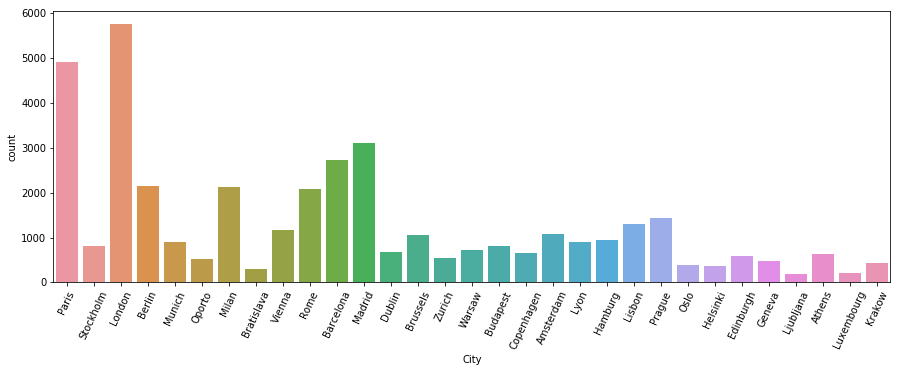

In [110]:
plt.figure(figsize=(15,5))
sns.countplot(df.City, orient = "h")
plt.xticks(rotation=65);

Пропусков, выбросов нет. Остается привести признак в числовой вид:

In [111]:
le = LabelEncoder()
df['City_enc'] = pd.Series(le.fit_transform(df.City),index=df.index)

### Cuisine_Style
согласно описанию - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане.  

**ИДЕИ  количество стилей**

посмотрим как устроен признак:

In [112]:
df.Cuisine_Style.head()

0              ['European', 'French', 'International']
1                                                  NaN
2    ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                  NaN
4    ['German', 'Central European', 'Vegetarian Fri...
Name: Cuisine_Style, dtype: object

In [113]:
df.Cuisine_Style = df.Cuisine_Style.fillna("['Nan_Style']").str[2:-2].str.split("', '")

In [114]:
cuisine_styles = sorted(set(df.Cuisine_Style.sum()))

In [115]:
for style in cuisine_styles:
    df[style] = df.Cuisine_Style.apply(lambda x: int(style in x))

In [116]:
df.Cuisine_Style = df.apply(lambda x: 0 if x.Nan_Style else len(x.Cuisine_Style),axis=1)

### Ranking
Согласно описанию - место, которое занимает данный ресторан среди всех ресторанов своего города

**ИДЕИ оценочное количество ресторанов вгороде, нормироаный по городам ренкинг, ренкинг в своей ценовой категории**

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)
```

Пропусков нет

In [117]:
df.Ranking.isna().sum()

0

In [118]:
df.Ranking.dtype

dtype('float64')

In [119]:
# df.Ranking[df.City == 'Oporto'].hist(bins = df.Ranking.max())

In [120]:
aa = df.groupby('City').Ranking
aa.apply(lambda x: x.index)['Amsterdam']

Int64Index([   31,    54,    77,    86,    99,   158,   178,   220,   326,
              355,
            ...
            39735, 39762, 39836, 39911, 39942, 39956, 39961, 39971, 39982,
            39983],
           dtype='int64', length=1086)

In [121]:
# aa.apply(lambda x: x.max())

In [195]:
df['ranking_change'] = df.Restaurant_id_enc - df.Ranking + 1 

### Price_Range
Согласно описанию - диапазон цен в ресторане   
**ИДЕИ: доля ресторанов с таким PrRa**

In [122]:
df.Price_Range.unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [123]:
price_range_encod = {'$': 1, '$$ - $$$': 2, '$$$$': 3, '-': 0}
df['Price_Range_enc'] = df.Price_Range.fillna('-').map(price_range_encod)

### Number_of_Reviews
Согласно описанию - количество отзывов о ресторане  
**ИДЕИ: соотношение NoR с ранней датой, с номером в базе, бьется с отсутсвием Reviews? сравнить со средним количеством по городу.**

In [124]:
df.Number_of_Reviews.dtype

dtype('float64')

In [125]:
df.Number_of_Reviews.fillna(-999,inplace=True)

aaa = df[df.Number_of_Reviews.isna()][['Cuisine_Style','Price_Range','Number_of_Reviews','Reviews','Rating']]
aaa.head(10)

aaa[aaa.Reviews=='[[], []]'].Rating.value_counts(normalize=True).sort_index()

aaa.Rating.value_counts(normalize=True).sort_index()

df[df.Number_of_Reviews == 2].Rating.value_counts(normalize=True).sort_index()

df.Rating.value_counts(normalize=True).sort_index()

plt.figure(figsize=(15,4))
df.Number_of_Reviews.dropna().hist(bins = 1000)
plt.semilogy();

### ID_TA
есть дубли? меньше номер раньше в базе, сопоставить с датой первого отзыва

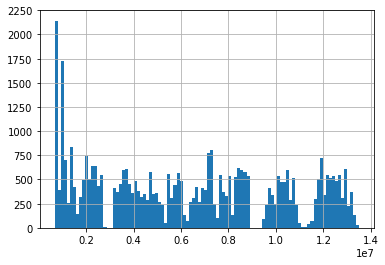

In [132]:
df.ID_TA.isna().sum()

df.ID_TA.apply(lambda x: x[0] != 'd').sum()

df.ID_TA = df.ID_TA.str[1:].astype(int)

df.ID_TA.hist(bins = 100)

### Reviews
Согласно описанию - данные о двух отзывах, которые отображаются на сайте ресторана  
**ИДЕИ:дата раннего, дата позднего, срок от последнего отзыва до тоталпоследнего отзыва, соотносятся с ID_TA?  разброс в датах отзывов, наличие пропуска, тональность отзыва, длинна отзыва, грамматичнские ошибки в отзыве**

In [133]:
(df.Reviews == '[[], []]').sum()

6471

+++++++++++++++++++++++++++++++

In [134]:
df['Review_texts'] = df.Reviews.apply(lambda x:x[: x.find('], [')+1]).str.replace("[\[\]]", "")

In [135]:
str_to_data = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').date()
today = datetime.datetime.today().date()
review_date_lists = df.Reviews.apply(lambda x:x[ x.find('], [')+3:]).str.replace("[\[\]' ]", "").str.split(",")

In [136]:
df['since_review'] = review_date_lists.apply(lambda x: (today - str_to_data(x[-1])).days if x[-1] 
                                             else -999)

In [137]:
df['review_date_range'] = review_date_lists.apply(lambda x: (str_to_data(x[1]) - str_to_data(x[0])).days if len(x) == 2 
                                                  else 0)

In [177]:
first_review = review_date_lists.apply(lambda x: str_to_data(x[0]) if x[0] else 0)
review_index = first_review[first_review !=0].sort_values().index

ID_TA_with_review = df.loc[review_index].ID_TA

review_rank_dict = {val: rank for rank, val in enumerate(sorted(first_review[review_index]))}
review_rank = first_review[review_index].map(review_rank_dict)

ID_TA_rank_dict = {val: rank for rank, val in enumerate(sorted(ID_TA_with_review))}
ID_TA_rank = ID_TA_with_review.map(ID_TA_rank_dict)

df['rank_dif'] = ID_TA_rank - review_rank

df.rank_dif.fillna(0, inplace=True)

### URL_TA
понять что за g187147, после города регион, может вытащить пропущенные ID_TA?

In [140]:
g_fig = df.URL_TA.apply(lambda x: int(x[x.find('-g')+2:x.find('-d')]))

In [141]:
g_fig.max() - g_fig.min()

4319141

In [142]:
df.ID_TA[2]

8632781

In [143]:
df.URL_TA[0]

'/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html'

In [144]:
df.URL_TA[1]

'/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html'

In [145]:
df.URL_TA[2]

'/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html'

### ПРОВЕРКА

In [196]:
coltodrop = ['City', 'Reviews', 'URL_TA','Review_texts', 'Price_Range']

In [197]:
dffm = df.drop(columns=coltodrop)

In [198]:
dffm.dtypes[dffm.dtypes == object]

Restaurant_id    object
dtype: object

In [199]:
dffm.isna().sum().sum()

0

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [200]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = dffm.drop(['Restaurant_id', 'Rating'], axis = 1)
y = dffm['Rating']

In [201]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [202]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [203]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [204]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [205]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.22765649999999996


MAE: 0.232775, 

## Вот по каким критериям проект будет оценивать ментор:

 - Качество кода (ясность, соответствие стандартам оформления pep-8, наличие комментариев).
 - Наличие визуализации с выводами (корреляция и важность признаков).
 - Feature Engineering и обогащение датасета (4 - наличие редких/уникальных предикторов модели).
 - Работа с метрикой МАЕ.
 - Использование внешних источников данных.

In [40]:
# ================================================ПОДВАЛ==========================================

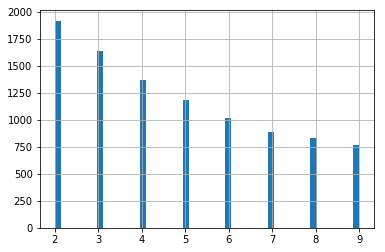

In [41]:
df['Number of Reviews'][df['Number of Reviews']<10].hist(bins = 50)

In [183]:
aa = pd.Series([1,1,1,23,np.NaN,5,])
np.NaN in aa.value_counts(dropna=False).index

True

## 3. Машинное обучение для чайников

 На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типа object, и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для  всего столбца.

In [ ]:
df1 = df.drop(columns=df.columns[df.dtypes == np.object])
df1.fillna(0,inplace=True)

X = df1.drop(['Rating'], axis = 1)
y = df1['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# ПОДВАЛ

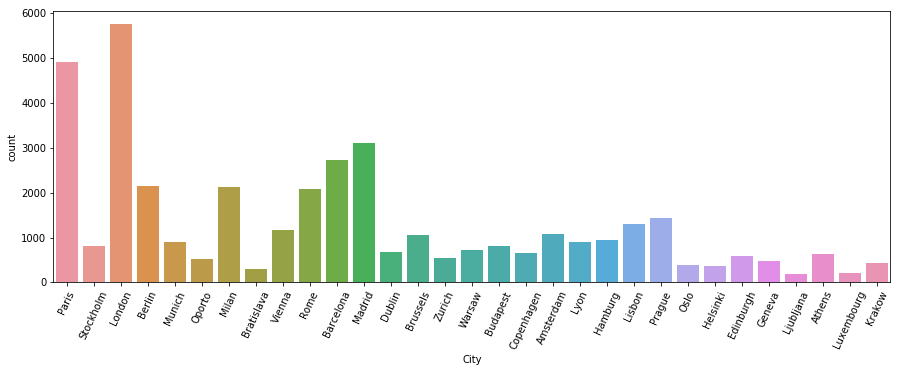

In [255]:
plt.figure(figsize=(15,5))
sns.countplot(df.City, orient = "v")
plt.xticks(rotation=65);

In [26]:
df.head(10)

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,Restaurant_id_enc,City_enc,Afghani,African,Albanian,...,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,id_5569,Paris,3,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,5569,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,0,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1535,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_352,London,7,353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,352,16,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,id_3456,Berlin,0,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3456,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,3,621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,615,21,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,id_1418,Oporto,0,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,1418,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,id_1720,Milan,2,1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,1720,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,id_825,Bratislava,1,826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765,825,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,id_2690,Vienna,0,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,2690,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,id_4209,Rome,3,4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,4209,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df.shape

(40000, 138)

In [378]:
df.Price_Range[1] is np.NaN

True

In [69]:
df.Reviews[39989]

"[['I love this place!'], ['08/24/2015']]"

In [ ]:
display(df.Reviews[5])
display(df.Reviews[39989])
display(df.Reviews[3])

In [51]:
# df['Reviews_enc'] = df.Reviews.apply(lambda x: x[:-min(len(x)//2,2)])

# x = df.Reviews.apply(lambda x: x[-min(len(x)//2,2):])

# str_to_data = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').date()
# df.Reviews.apply(lambda x: x[-min(len(x)//2,2):]).apply(lambda x: [str_to_data(y) for y in x] if x[0] else np.nan)

# df.Reviews.apply(lambda x: x[len(x)//2:])[:10]

In [154]:
# df[df.Review_texts=='']

In [176]:
df[df.review_date_range > 0].Rating.value_counts(normalize=True).sort_index() 

1.5    0.000514
2.0    0.010791
2.5    0.024152
3.0    0.132066
3.5    0.199897
4.0    0.567831
4.5    0.050874
5.0    0.013875
Name: Rating, dtype: float64

In [180]:
df[df.review_date_range < -1000].Rating.value_counts(normalize=True).sort_index()

1.5    0.002618
2.0    0.013089
2.5    0.049738
3.0    0.120419
3.5    0.222513
4.0    0.321990
4.5    0.235602
5.0    0.034031
Name: Rating, dtype: float64